### VID 339 TYPES OF FILE FORMAT SUPPORTING TENSORFLOW 2.0 

In [1]:
import numpy as np
import tensorflow as tf

#### Data Generation

In [2]:
observations = 1000

xs = np.random.uniform(low=-10, high=10, size=(observations,1))
zs = np.random.uniform(-10, 10, (observations,1))
generated_inputs = np.column_stack((xs,zs))
noise = np.random.uniform(-1, 1, (observations,1))
generated_targets = 2*xs - 3*zs + 5 + noise

np.savez('TF_intro', inputs=generated_inputs, targets=generated_targets)

In [3]:
# IN MACHINE LEARNING AFTER PREPROCESSING A PARTICULAR FILE FORMAT YOU HAVE TO SAVE AS NUMPY FILE TYPE (NPZ)

### VID 340 Outlining the model with tensor

In [4]:
training_data = np.load('TF_intro.npz')

In [5]:
from tensorflow import keras

input_size=2 # two input variables -xs nd zs
output_size=1 # one output -y

# WHEN EMPLOYING TF WE MUST ACTUALLY BUILD THE MODEL

# KERAS TF2 is based on keras so its the modul that is needed to build the model
# Sequential is the fn that indicates we are laying down model. it takes as arguement the different layer we'd like to include in our algo
# tf.keras.Sequential()-fn that specifies how the model will be laid down (stacks layers)


model = tf.keras.Sequential([
                          tf.keras.layers.Dense(output_size)
                          ])

model.compile(optimizer='sgd', loss='mean_squared_error') 
# now we deal with OBJECTIVE FN AND OPTIMIZATION ALGO. the method which allows us to specify them is COMPILE.
# HERE WE USE THE L2-NORM LOSS SCALED BY THE NUMBER OF OBSERVATIONS

model.compile(optimizer='sgd', loss='mean_squared_error')

# We use model.fit(inputs,targets)fits (train) the model
model.fit(training_data['inputs'], training_data['targets'], epochs=100, verbose=2)

# Epoch is ITERATION OVER THE FULL DATASET

# here the algo we are building has a simple structure. it takes input, applies a single linear transformation and provides output
# THE LINEAR COBINATION + OUTPUT = LAYER

# tf.keras.layers.Dense (output) takes the inputs provided to the model and calculates the dot product of the inputs and the weights and adds the bias
# ie OUTPUT = NP.DOT(INPUTS,WTS) + BIAS
# we must specify the output size in the bracket (output_size)

# when you set verbose to 0(silence or no output) u will see nothing about the training data
# VERBOSE= 1 stands for 'progress bar'
# VERBOSE= 1 stands for- "one line per epoch"
# on the right is the current value of the loss function
# On the left is a timer tracking the time for each epoch

Train on 1000 samples
Epoch 1/100
1000/1000 - 1s - loss: 33.3053
Epoch 2/100
1000/1000 - 0s - loss: 4.7015
Epoch 3/100
1000/1000 - 0s - loss: 1.5227
Epoch 4/100
1000/1000 - 0s - loss: 0.6848
Epoch 5/100
1000/1000 - 0s - loss: 0.4483
Epoch 6/100
1000/1000 - 0s - loss: 0.3886
Epoch 7/100
1000/1000 - 0s - loss: 0.3660
Epoch 8/100
1000/1000 - 0s - loss: 0.3559
Epoch 9/100
1000/1000 - 0s - loss: 0.3561
Epoch 10/100
1000/1000 - 0s - loss: 0.3583
Epoch 11/100
1000/1000 - 0s - loss: 0.3622
Epoch 12/100
1000/1000 - 0s - loss: 0.3593
Epoch 13/100
1000/1000 - 0s - loss: 0.3654
Epoch 14/100
1000/1000 - 0s - loss: 0.3609
Epoch 15/100
1000/1000 - 0s - loss: 0.3611
Epoch 16/100
1000/1000 - 0s - loss: 0.3586
Epoch 17/100
1000/1000 - 0s - loss: 0.3568
Epoch 18/100
1000/1000 - 0s - loss: 0.3650
Epoch 19/100
1000/1000 - 0s - loss: 0.3544
Epoch 20/100
1000/1000 - 0s - loss: 0.3631
Epoch 21/100
1000/1000 - 0s - loss: 0.3633
Epoch 22/100
1000/1000 - 0s - loss: 0.3581
Epoch 23/100
1000/1000 - 0s - loss: 0.36

### VID 241 INTERPRETING THE RESULT AND EXTRACTING THE WT ND BIAS
#### Extract the wt and Bias

In [6]:
model.layers[0].get_weights()

# model- the model we created
# layer[0]- layer that we are interested in (ie layer zero)
# 

[array([[ 2.0092993],
        [-2.9752734]], dtype=float32),
 array([5.029584], dtype=float32)]

In [7]:
bias = model.layers[0].get_weights()[1]
bias

array([5.029584], dtype=float32)

### Extract the outputs (make predictions)

In [8]:
# AttributeError: 'tensorflow.python.framework.ops.EagerTensor' object has no attribute 'round'
# indicates that the round() method is not directly applicable to TensorFlow EagerTensors

# USE THIS BELOW INSTEAD



import matplotlib.pyplot as plt
model.predict_on_batch(training_data['inputs'])

predictions = model.predict_on_batch(training_data['inputs'])
rounded_predictions = tf.round(predictions) 

# Convert to NumPy array for easier manipulation (optional)
rounded_predictions_np = rounded_predictions.numpy() 

print(rounded_predictions_np)

# these are the values that were compared to the targets to evaluate the loss function ie the output after 100 epochs of training

[[-41.]
 [-11.]
 [-11.]
 [ 15.]
 [ 18.]
 [ 18.]
 [ 29.]
 [-28.]
 [ 33.]
 [  0.]
 [  7.]
 [ 25.]
 [ 23.]
 [ 36.]
 [  7.]
 [  4.]
 [ 24.]
 [ 28.]
 [-24.]
 [ 36.]
 [ -6.]
 [ -2.]
 [ 10.]
 [-11.]
 [ 11.]
 [ 14.]
 [ 38.]
 [-10.]
 [ 18.]
 [  6.]
 [  1.]
 [ 16.]
 [  8.]
 [ 26.]
 [ 20.]
 [ -2.]
 [  9.]
 [-19.]
 [  0.]
 [  4.]
 [ -9.]
 [ -1.]
 [  6.]
 [ 38.]
 [ -8.]
 [-13.]
 [  3.]
 [-11.]
 [ 25.]
 [-20.]
 [ 17.]
 [-16.]
 [  2.]
 [ 10.]
 [  3.]
 [-19.]
 [ 29.]
 [ 45.]
 [ 14.]
 [ -1.]
 [-16.]
 [-19.]
 [  1.]
 [ 17.]
 [ 29.]
 [ -9.]
 [  0.]
 [  2.]
 [-31.]
 [-31.]
 [ 22.]
 [-17.]
 [ -3.]
 [-20.]
 [ 15.]
 [-10.]
 [  6.]
 [ 34.]
 [  5.]
 [  7.]
 [ -8.]
 [ 19.]
 [ 35.]
 [  5.]
 [ 27.]
 [ 41.]
 [ 13.]
 [  2.]
 [ 12.]
 [ 21.]
 [-30.]
 [-32.]
 [ 13.]
 [-20.]
 [-17.]
 [  2.]
 [  1.]
 [ 26.]
 [  2.]
 [-25.]
 [ 13.]
 [ 28.]
 [ 19.]
 [ -7.]
 [  1.]
 [ -9.]
 [ -2.]
 [  1.]
 [ -2.]
 [-10.]
 [-22.]
 [ 14.]
 [ -2.]
 [ 27.]
 [ -4.]
 [-31.]
 [ 22.]
 [ 40.]
 [-26.]
 [ -2.]
 [-17.]
 [  6.]
 [-21.]
 [-17.]
 [ 17.]


In [9]:
training_data['targets'].round(1)

# OBSERVE THAT THE OUTPUT AND TATGET ARE VERY SIMILAR

array([[-39.9],
       [-10.6],
       [-12.3],
       [ 15.9],
       [ 16.9],
       [ 17.8],
       [ 29.3],
       [-28.4],
       [ 32.1],
       [  0.1],
       [  6.8],
       [ 24.1],
       [ 23.9],
       [ 35.6],
       [  5.9],
       [  4.2],
       [ 24.2],
       [ 28.3],
       [-23.2],
       [ 36.8],
       [ -6. ],
       [ -2.8],
       [ 11.1],
       [-11.5],
       [ 10.6],
       [ 14.1],
       [ 39.3],
       [ -8.9],
       [ 17. ],
       [  6.3],
       [  1.7],
       [ 14.4],
       [  7.5],
       [ 25.6],
       [ 19.3],
       [ -2.3],
       [  8. ],
       [-18.7],
       [  1.4],
       [  4.6],
       [ -8.6],
       [ -0.3],
       [  4.8],
       [ 37.8],
       [ -8. ],
       [-12.6],
       [  2.9],
       [-12. ],
       [ 25.4],
       [-20.5],
       [ 16.8],
       [-16.2],
       [  3. ],
       [  8.9],
       [  2.4],
       [-18.4],
       [ 29.6],
       [ 45.8],
       [ 13.2],
       [ -1.8],
       [-15.2],
       [-18.7],
       [

## Plotting the data

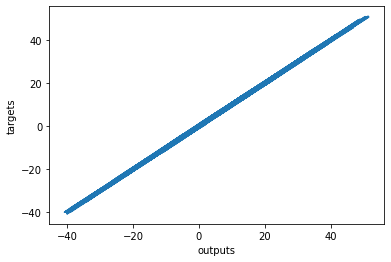

In [10]:
# We have to np.squeeze the arrays in order to fit them to what the plot function expects.
# Doesn't change anything as we cut dimensions of size 1 - just a technicality.

plt.plot(np.squeeze(model.predict_on_batch(training_data['inputs'])), np.squeeze(training_data['targets']))
plt.xlabel('outputs')
plt.ylabel('targets')
plt.show()

# THE LINE SHOULD BE AS CLOSE TO 45D AS POSSIBLE

### CUSTOMIZING A TENSORFLOW 2 MODEL
#### SOLVING WITH TENSORFLOW

In [11]:
# IN THE NUMPY NEURAL network we
# 1 had to select the best way to initialize the wt; we chose the starting ponts of wt and nos to be random numbers

# We can us ethis
#  tf.keras.layers.Dense(output_size, kernal_initializer, bias_initializer)- fn that is laying down the model 
# (used to stack layers) and initialize wts   
# LEARNING RATE is an integral part of the optimizer

input_size=2 # two input variables -xs nd zs
output_size=1 # one output -y

# Each 'layer' is listed here
# The method 'Dense' indicates, our mathematical operation to be (xw + b)

model = tf.keras.Sequential([
                          tf.keras.layers.Dense(output_size,
                                               kernel_initializer=tf.random_uniform_initializer(minval=-0.1, maxval=0.1),
                                               bias_initializer=tf.random_uniform_initializer(minval=-0.1, maxval=0.1)
                                               )
                          ])

# tf.keras.optimizers.SGD(learning_rate) -stochastic gradient descent optimizer, including support for learning rate, momentum,
# decay, etc

custom_optimizer = tf.keras.optimizers.SGD(learning_rate= 0.02) 

model.compile(optimizer = custom_optimizer, loss='mean_squared_error') 

# the new result will be practically same, with the diff that we get to set the learning rate
# NOTE; loss fn can be adjusted (but its hard)

model.compile(optimizer='sgd', loss='mean_squared_error')

# We use model.fit(inputs,targets)fits (train) the model
model_fit= model.fit(training_data['inputs'], training_data['targets'], epochs=100, verbose=2)
# kernel is a broader term for wts


Train on 1000 samples
Epoch 1/100
1000/1000 - 1s - loss: 29.6345
Epoch 2/100
1000/1000 - 0s - loss: 4.8626
Epoch 3/100
1000/1000 - 0s - loss: 1.6077
Epoch 4/100
1000/1000 - 0s - loss: 0.6829
Epoch 5/100
1000/1000 - 0s - loss: 0.4572
Epoch 6/100
1000/1000 - 0s - loss: 0.3865
Epoch 7/100
1000/1000 - 0s - loss: 0.3697
Epoch 8/100
1000/1000 - 0s - loss: 0.3641
Epoch 9/100
1000/1000 - 0s - loss: 0.3583
Epoch 10/100
1000/1000 - 0s - loss: 0.3516
Epoch 11/100
1000/1000 - 0s - loss: 0.3551
Epoch 12/100
1000/1000 - 0s - loss: 0.3613
Epoch 13/100
1000/1000 - 0s - loss: 0.3581
Epoch 14/100
1000/1000 - 0s - loss: 0.3573
Epoch 15/100
1000/1000 - 0s - loss: 0.3625
Epoch 16/100
1000/1000 - 0s - loss: 0.3556
Epoch 17/100
1000/1000 - 0s - loss: 0.3656
Epoch 18/100
1000/1000 - 0s - loss: 0.3562
Epoch 19/100
1000/1000 - 0s - loss: 0.3644
Epoch 20/100
1000/1000 - 0s - loss: 0.3533
Epoch 21/100
1000/1000 - 0s - loss: 0.3554
Epoch 22/100
1000/1000 - 0s - loss: 0.3576
Epoch 23/100
1000/1000 - 0s - loss: 0.36

In [12]:
model.predict_on_batch(training_data['inputs'])

predictions = model.predict_on_batch(training_data['inputs'])
rounded_predictions = tf.round(predictions) 

# Convert to NumPy array for easier manipulation (optional)
rounded_predictions_np = rounded_predictions.numpy() 

print(rounded_predictions_np)

# these are the values that were compared to the targets to evaluate the loss function ie the output after 100 epochs of training

[[-41.]
 [-12.]
 [-12.]
 [ 15.]
 [ 17.]
 [ 19.]
 [ 29.]
 [-28.]
 [ 33.]
 [  0.]
 [  7.]
 [ 25.]
 [ 23.]
 [ 36.]
 [  6.]
 [  5.]
 [ 23.]
 [ 28.]
 [-24.]
 [ 36.]
 [ -7.]
 [ -2.]
 [ 10.]
 [-11.]
 [ 11.]
 [ 14.]
 [ 38.]
 [-10.]
 [ 18.]
 [  6.]
 [  2.]
 [ 15.]
 [  8.]
 [ 27.]
 [ 20.]
 [ -2.]
 [  9.]
 [-19.]
 [  0.]
 [  4.]
 [ -9.]
 [ -1.]
 [  5.]
 [ 39.]
 [ -9.]
 [-13.]
 [  3.]
 [-11.]
 [ 25.]
 [-20.]
 [ 18.]
 [-16.]
 [  2.]
 [ 10.]
 [  2.]
 [-19.]
 [ 29.]
 [ 45.]
 [ 13.]
 [ -2.]
 [-16.]
 [-19.]
 [  1.]
 [ 17.]
 [ 29.]
 [ -9.]
 [  0.]
 [  3.]
 [-30.]
 [-31.]
 [ 22.]
 [-18.]
 [ -3.]
 [-20.]
 [ 16.]
 [ -9.]
 [  6.]
 [ 34.]
 [  5.]
 [  7.]
 [ -9.]
 [ 19.]
 [ 35.]
 [  5.]
 [ 27.]
 [ 41.]
 [ 14.]
 [  3.]
 [ 12.]
 [ 21.]
 [-31.]
 [-32.]
 [ 12.]
 [-20.]
 [-17.]
 [  2.]
 [  2.]
 [ 26.]
 [  1.]
 [-25.]
 [ 13.]
 [ 28.]
 [ 19.]
 [ -7.]
 [  1.]
 [ -8.]
 [ -1.]
 [  2.]
 [ -2.]
 [-11.]
 [-22.]
 [ 14.]
 [ -2.]
 [ 28.]
 [ -4.]
 [-31.]
 [ 22.]
 [ 40.]
 [-26.]
 [ -2.]
 [-17.]
 [  6.]
 [-21.]
 [-17.]
 [ 17.]


In [13]:
training_data['targets'].round(1)

# OBSERVE THAT THE OUTPUT AND TATGET ARE VERY SIMILAR

array([[-39.9],
       [-10.6],
       [-12.3],
       [ 15.9],
       [ 16.9],
       [ 17.8],
       [ 29.3],
       [-28.4],
       [ 32.1],
       [  0.1],
       [  6.8],
       [ 24.1],
       [ 23.9],
       [ 35.6],
       [  5.9],
       [  4.2],
       [ 24.2],
       [ 28.3],
       [-23.2],
       [ 36.8],
       [ -6. ],
       [ -2.8],
       [ 11.1],
       [-11.5],
       [ 10.6],
       [ 14.1],
       [ 39.3],
       [ -8.9],
       [ 17. ],
       [  6.3],
       [  1.7],
       [ 14.4],
       [  7.5],
       [ 25.6],
       [ 19.3],
       [ -2.3],
       [  8. ],
       [-18.7],
       [  1.4],
       [  4.6],
       [ -8.6],
       [ -0.3],
       [  4.8],
       [ 37.8],
       [ -8. ],
       [-12.6],
       [  2.9],
       [-12. ],
       [ 25.4],
       [-20.5],
       [ 16.8],
       [-16.2],
       [  3. ],
       [  8.9],
       [  2.4],
       [-18.4],
       [ 29.6],
       [ 45.8],
       [ 13.2],
       [ -1.8],
       [-15.2],
       [-18.7],
       [

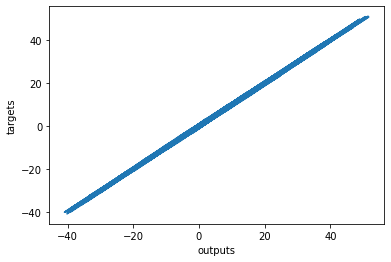

In [14]:
# We have to np.squeeze the arrays in order to fit them to what the plot function expects.
# Doesn't change anything as we cut dimensions of size 1 - just a technicality.

plt.plot(np.squeeze(model.predict_on_batch(training_data['inputs'])), np.squeeze(training_data['targets']))
plt.xlabel('outputs')
plt.ylabel('targets')
plt.show()

# THE LINE SHOULD BE AS CLOSE TO 45D AS POSSIBLE

### EXERCISE 3;
### change the l2 norm loss to huber_loss

In [15]:
# 3. An alternative loss for regressions is the Huber loss
# The Huber loss is more appropriate than the L2-norm when we have outliers, as it is less sensitive to them (in our example we don't have outliers, but you will surely stumble upon a dataset with outliers in the future) 
# The L2-norm loss puts all differences *to the square*, so outliers have a lot of influence on the outcome.
# The proper syntax of the Huber loss is 'huber_loss' is model.compile(optimizer=custom_optimizer, loss='huber_loss')
# Generally, the Huber loss is used when we have a lot of outliers."

In [16]:
# IN THE NUMPY NEURAL network we
# 1 had to select the best way to initialize the wt; we chose the starting ponts of wt and nos to be random numbers

# We can us ethis
#  tf.keras.layers.Dense(output_size, kernal_initializer, bias_initializer)- fn that is laying down the model 
# (used to stack layers) and initialize wts   
# LEARNING RATE is an integral part of the optimizer

input_size=2 # two input variables -xs nd zs
output_size=1 # one output -y

# Each 'layer' is listed here
# The method 'Dense' indicates, our mathematical operation to be (xw + b)

model = tf.keras.Sequential([
                          tf.keras.layers.Dense(output_size,
                                               kernel_initializer=tf.random_uniform_initializer(minval=-0.1, maxval=0.1),
                                               bias_initializer=tf.random_uniform_initializer(minval=-0.1, maxval=0.1)
                                               )
                          ])

# tf.keras.optimizers.SGD(learning_rate) -stochastic gradient descent optimizer, including support for learning rate, momentum,
# decay, etc

custom_optimizer = tf.keras.optimizers.SGD(learning_rate= 0.02) 

model.compile(optimizer=custom_optimizer, loss='huber_loss')

# the new result will be practically same, with the diff that we get to set the learning rate
# NOTE; loss fn can be adjusted (but its hard)


# We use model.fit(inputs,targets)fits (train) the model
model_fit= model.fit(training_data['inputs'], training_data['targets'], epochs=100, verbose=2)
# kernel is a broader term for wts


Train on 1000 samples
Epoch 1/100
1000/1000 - 1s - loss: 10.9569
Epoch 2/100
1000/1000 - 0s - loss: 4.3545
Epoch 3/100
1000/1000 - 0s - loss: 3.4914
Epoch 4/100
1000/1000 - 0s - loss: 2.8655
Epoch 5/100
1000/1000 - 0s - loss: 2.2511
Epoch 6/100
1000/1000 - 0s - loss: 1.6413
Epoch 7/100
1000/1000 - 0s - loss: 1.0533
Epoch 8/100
1000/1000 - 0s - loss: 0.6051
Epoch 9/100
1000/1000 - 0s - loss: 0.3445
Epoch 10/100
1000/1000 - 0s - loss: 0.2390
Epoch 11/100
1000/1000 - 0s - loss: 0.1991
Epoch 12/100
1000/1000 - 0s - loss: 0.1869
Epoch 13/100
1000/1000 - 0s - loss: 0.1788
Epoch 14/100
1000/1000 - 0s - loss: 0.1817
Epoch 15/100
1000/1000 - 0s - loss: 0.1802
Epoch 16/100
1000/1000 - 0s - loss: 0.1779
Epoch 17/100
1000/1000 - 0s - loss: 0.1805
Epoch 18/100
1000/1000 - 0s - loss: 0.1777
Epoch 19/100
1000/1000 - 0s - loss: 0.1795
Epoch 20/100
1000/1000 - 0s - loss: 0.1803
Epoch 21/100
1000/1000 - 0s - loss: 0.1779
Epoch 22/100
1000/1000 - 0s - loss: 0.1797
Epoch 23/100
1000/1000 - 0s - loss: 0.18

In [17]:
model.predict_on_batch(training_data['inputs'])

predictions = model.predict_on_batch(training_data['inputs'])
rounded_predictions = tf.round(predictions) 

# Convert to NumPy array for easier manipulation (optional)
rounded_predictions_np = rounded_predictions.numpy() 

print(rounded_predictions_np)

# these are the values that were compared to the targets to evaluate the loss function ie the output after 100 epochs of training

[[-40.]
 [-11.]
 [-11.]
 [ 15.]
 [ 18.]
 [ 18.]
 [ 29.]
 [-28.]
 [ 33.]
 [  0.]
 [  7.]
 [ 25.]
 [ 23.]
 [ 36.]
 [  6.]
 [  4.]
 [ 24.]
 [ 28.]
 [-24.]
 [ 36.]
 [ -6.]
 [ -2.]
 [ 10.]
 [-11.]
 [ 11.]
 [ 14.]
 [ 38.]
 [-10.]
 [ 18.]
 [  6.]
 [  1.]
 [ 15.]
 [  8.]
 [ 26.]
 [ 20.]
 [ -2.]
 [  9.]
 [-19.]
 [  0.]
 [  4.]
 [ -9.]
 [ -1.]
 [  6.]
 [ 38.]
 [ -8.]
 [-13.]
 [  3.]
 [-11.]
 [ 25.]
 [-20.]
 [ 17.]
 [-16.]
 [  2.]
 [ 10.]
 [  2.]
 [-19.]
 [ 29.]
 [ 45.]
 [ 13.]
 [ -1.]
 [-16.]
 [-19.]
 [  1.]
 [ 17.]
 [ 29.]
 [ -9.]
 [  0.]
 [  2.]
 [-30.]
 [-31.]
 [ 22.]
 [-17.]
 [ -3.]
 [-20.]
 [ 15.]
 [ -9.]
 [  6.]
 [ 34.]
 [  5.]
 [  7.]
 [ -8.]
 [ 19.]
 [ 35.]
 [  5.]
 [ 27.]
 [ 41.]
 [ 14.]
 [  3.]
 [ 12.]
 [ 21.]
 [-30.]
 [-32.]
 [ 12.]
 [-20.]
 [-17.]
 [  2.]
 [  1.]
 [ 26.]
 [  1.]
 [-25.]
 [ 13.]
 [ 28.]
 [ 19.]
 [ -7.]
 [  1.]
 [ -9.]
 [ -2.]
 [  1.]
 [ -2.]
 [-10.]
 [-22.]
 [ 14.]
 [ -2.]
 [ 27.]
 [ -4.]
 [-31.]
 [ 22.]
 [ 40.]
 [-25.]
 [ -2.]
 [-17.]
 [  6.]
 [-21.]
 [-17.]
 [ 17.]


In [18]:
training_data['targets'].round(1)

# OBSERVE THAT THE OUTPUT AND TATGET ARE VERY SIMILAR

array([[-39.9],
       [-10.6],
       [-12.3],
       [ 15.9],
       [ 16.9],
       [ 17.8],
       [ 29.3],
       [-28.4],
       [ 32.1],
       [  0.1],
       [  6.8],
       [ 24.1],
       [ 23.9],
       [ 35.6],
       [  5.9],
       [  4.2],
       [ 24.2],
       [ 28.3],
       [-23.2],
       [ 36.8],
       [ -6. ],
       [ -2.8],
       [ 11.1],
       [-11.5],
       [ 10.6],
       [ 14.1],
       [ 39.3],
       [ -8.9],
       [ 17. ],
       [  6.3],
       [  1.7],
       [ 14.4],
       [  7.5],
       [ 25.6],
       [ 19.3],
       [ -2.3],
       [  8. ],
       [-18.7],
       [  1.4],
       [  4.6],
       [ -8.6],
       [ -0.3],
       [  4.8],
       [ 37.8],
       [ -8. ],
       [-12.6],
       [  2.9],
       [-12. ],
       [ 25.4],
       [-20.5],
       [ 16.8],
       [-16.2],
       [  3. ],
       [  8.9],
       [  2.4],
       [-18.4],
       [ 29.6],
       [ 45.8],
       [ 13.2],
       [ -1.8],
       [-15.2],
       [-18.7],
       [

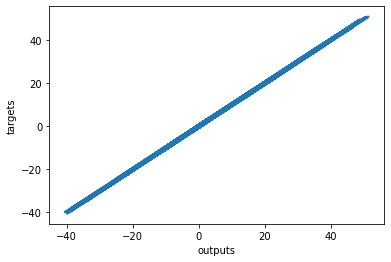

In [19]:
# We have to np.squeeze the arrays in order to fit them to what the plot function expects.
# Doesn't change anything as we cut dimensions of size 1 - just a technicality.

plt.plot(np.squeeze(model.predict_on_batch(training_data['inputs'])), np.squeeze(training_data['targets']))
plt.xlabel('outputs')
plt.ylabel('targets')
plt.show()

# THE LINE SHOULD BE AS CLOSE TO 45D AS POSSIBLE